Index(['value'], dtype='object')
p-value: 1.0
Critical Values: {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

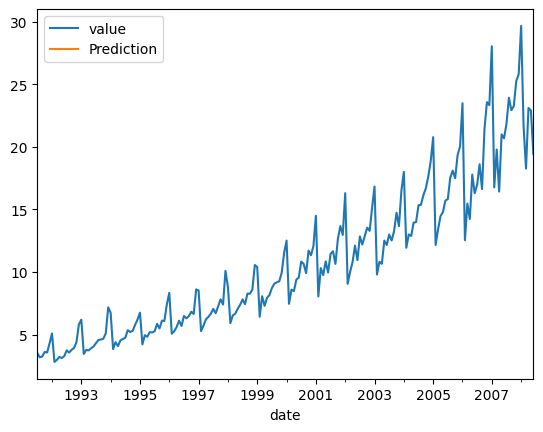

In [ ]:
#univeraiete time series 1(A)
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', index_col='date', parse_dates=True)

# Check the column names
print(df.columns)

# Replace 'value' with the correct column name if needed
column_name = 'value'  # Replace 'value' with the actual column name

# Check for stationarity
result = adfuller(df[column_name])
#print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Fit an ARIMA model
model = ARIMA(df[column_name], order=(2, 1, 2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(df), end=len(df) + 10)

# Plot the results
df['Prediction'] = predictions
df.plot()

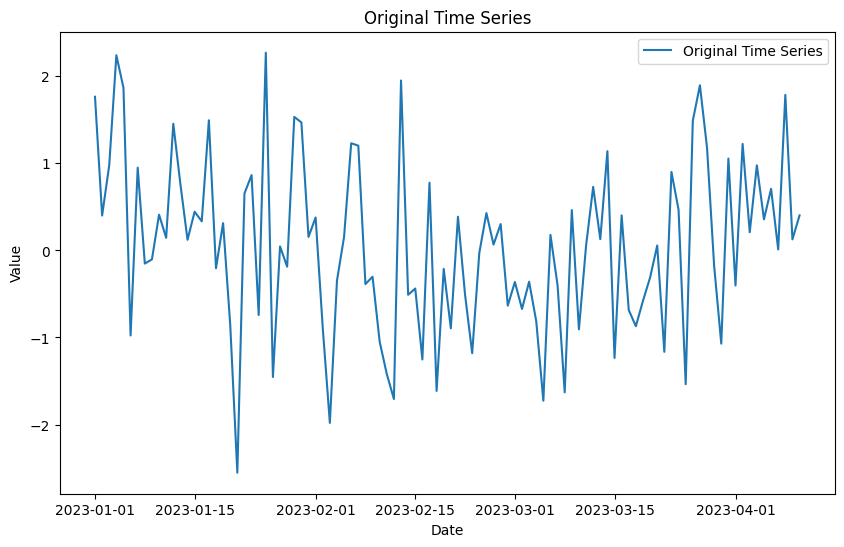

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    value   No. Observations:                  100
Model:             ExponentialSmoothing   SSE                             86.964
Optimized:                         True   AIC                              4.032
Trend:                             None   BIC                             27.479
Seasonal:                      Additive   AICC                             7.032
Seasonal Periods:                     7   Date:                 Thu, 31 Aug 2023
Box-Cox:                          False   Time:                         09:32:02
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0960579                alpha                 True
smoothing_seasonal       

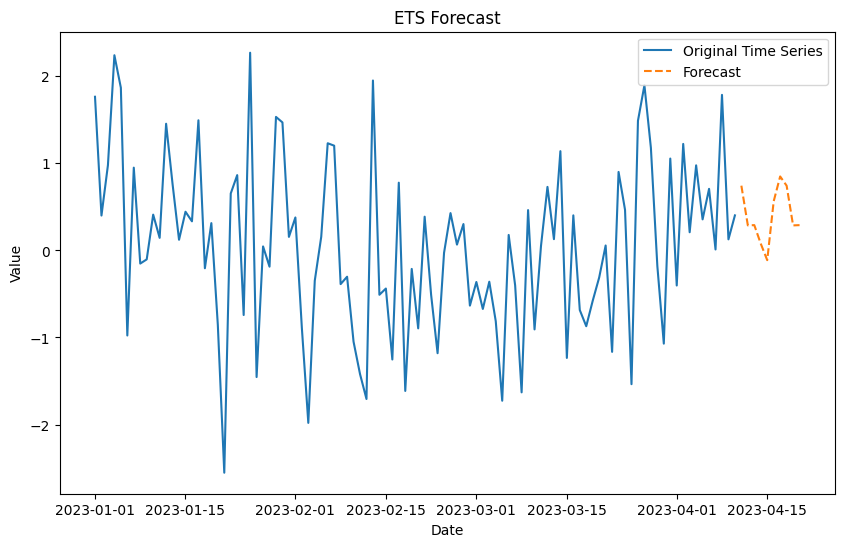

In [ ]:
#exponential smoothing 1(B)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate some example univariate time series data
np.random.seed(0)
time_steps = 100
mean = 0
stddev = 1
ts_data = np.random.normal(mean, stddev, size=time_steps)

# Create a pandas DataFrame
index = pd.date_range(start='2023-01-01', periods=time_steps, freq='D')
ts_df = pd.DataFrame({'value': ts_data}, index=index)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(ts_df.index, ts_df['value'], label='Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series')
plt.legend()
plt.show()

# Fit the ETS model
model = ExponentialSmoothing(ts_df['value'], seasonal='add', seasonal_periods=7)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Forecast future values
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

# Plot the original time series and the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ts_df.index, ts_df['value'], label='Original Time Series')
plt.plot(pd.date_range(start=index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ETS Forecast')
plt.legend()
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 31, Aug, 2023
Time:                     09:33:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.425619
Nobs:                     97.0000    HQIC:                  0.204271
Log likelihood:          -263.894    FPE:                    1.05603
AIC:                    0.0540114    Det(Omega_mle):        0.918654
--------------------------------------------------------------------
Results for equation var1
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.065851         0.099425           -0.662           0.508
L1.var1         0.276936         0.104415            2.652           0.008
L1.var2         0.096422         0.097950            0.984           0.325
L2.var1   

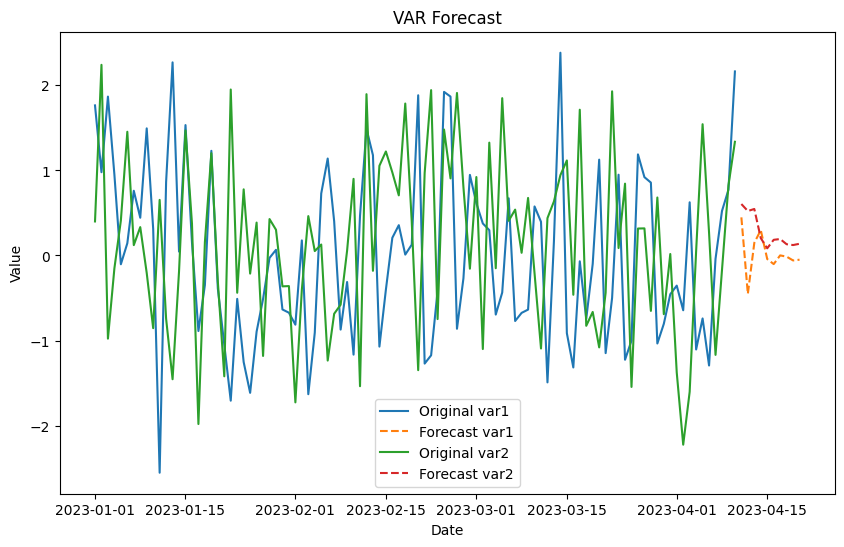

In [ ]:
# multivariate 2(A)
#vector autoregression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Generate example multivariate time series data
np.random.seed(0)
time_steps = 100
num_variables = 2
data = np.random.normal(size=(time_steps, num_variables))

# Create DataFrame
index = pd.date_range(start='2023-01-01', periods=time_steps, freq='D')
columns = [f'var{i+1}' for i in range(num_variables)]
ts_df = pd.DataFrame(data, columns=columns, index=index)

# Fit VAR model
model = VAR(ts_df)
lags = 3  # Number of lagged terms to include in the model
results = model.fit(lags)

# Print the summary of the model
print(results.summary())

# Forecast future values
forecast_steps = 10
forecast = results.forecast(ts_df.values[-lags:], steps=forecast_steps)

# Convert forecasted array to DataFrame
forecast_df = pd.DataFrame(forecast, columns=columns)

# Plot the original time series and the forecasted values
plt.figure(figsize=(10, 6))
for col in columns:
    plt.plot(ts_df.index, ts_df[col], label=f'Original {col}')
    plt.plot(pd.date_range(start=index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast_df[col], label=f'Forecast {col}', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('VAR Forecast')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecasted values for Variable 1:
2008-07-01    21.488012
2008-08-01    21.488012
2008-09-01    21.488012
2008-10-01    21.488012
2008-11-01    21.488012
2008-12-01    21.488012
2009-01-01    21.488012
2009-02-01    21.488012
2009-03-01    21.488012
2009-04-01    21.488012
Freq: MS, Name: predicted_mean, dtype: float64



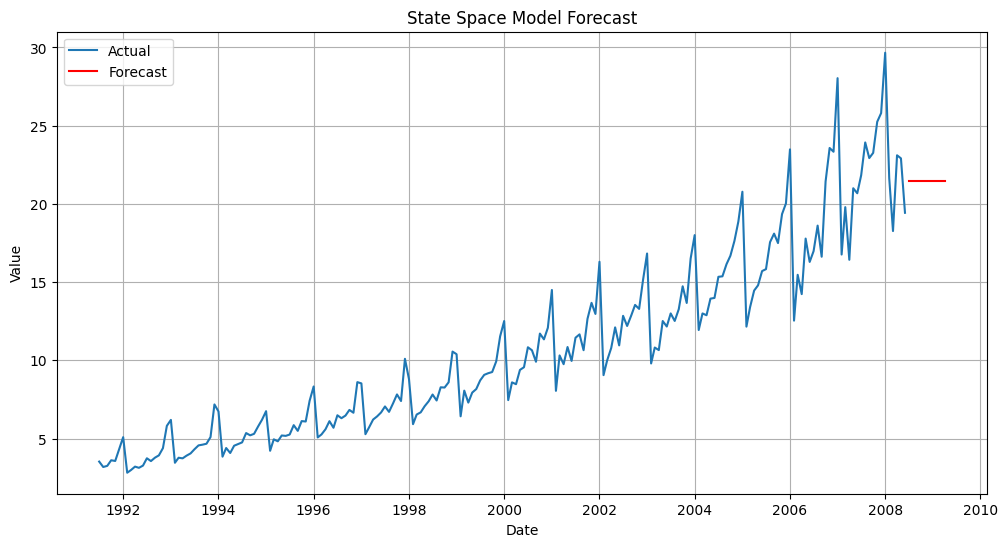

In [ ]:
#state space model 2(B)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, index_col='date', parse_dates=True)
num_variables = 1
models = [sm.tsa.UnobservedComponents(data['value'], 'local level')]
results = [model.fit() for model in models]
forecast_steps = 10
forecasts = [result.get_forecast(steps=forecast_steps) for result in results]
for var in range(num_variables):
    forecast_values = forecasts[var].predicted_mean
    print(f'Forecasted values for Variable {var + 1}:\n{forecast_values}\n')

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Actual')
plt.plot(forecasts[0].predicted_mean.index, forecasts[0].predicted_mean, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('State Space Model Forecast')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1557: RuntimeWarning: divide by zero encountered in log
  likeval -= (self.n_totobs - self.k_fe) * np.log(qf) / 2.
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:1797: RuntimeWarning: invalid value encountered in divide
  score_re += 0.5 * fac * rvavr[0:self.k_re2] / rvir
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/linalg/linalg.py:2094: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/usr/local/lib/python3.10/di

       Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: value 
No. Observations: 204     Method:             REML  
No. Groups:       1       Scale:              0.0000
Min. group size:  204     Log-Likelihood:     inf   
Max. group size:  204     Converged:          No    
Mean group size:  204.0                             
-----------------------------------------------------
            Coef.  Std.Err.  z  P>|z|  [0.025  0.975]
-----------------------------------------------------
Intercept   0.000                                    
value       1.000                                    
Group Var   0.000                                    



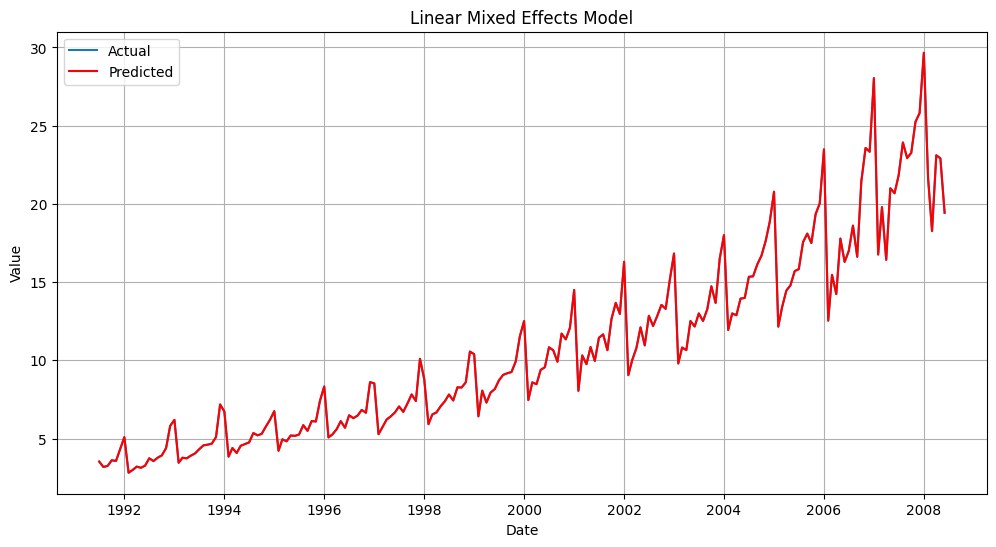

In [ ]:
#longitudinal time series 3(A)
#linear mixed effect model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
data = pd.read_csv(url, index_col='date', parse_dates=True)
data['subject'] = 1
model = sm.MixedLM.from_formula('value ~ value', data=data, groups=data['subject'])
results = model.fit()
print(results.summary())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Actual')
plt.plot(data.index, results.predict(), label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Linear Mixed Effects Model')
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4430.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):          5.08e-250
Time:                        09:58:18   Log-Likelihood:                -359.83
No. Observations:                 500   AIC:                             723.7
Df Residuals:                     498   BIC:                             732.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9151      0.041    118.753      0.0

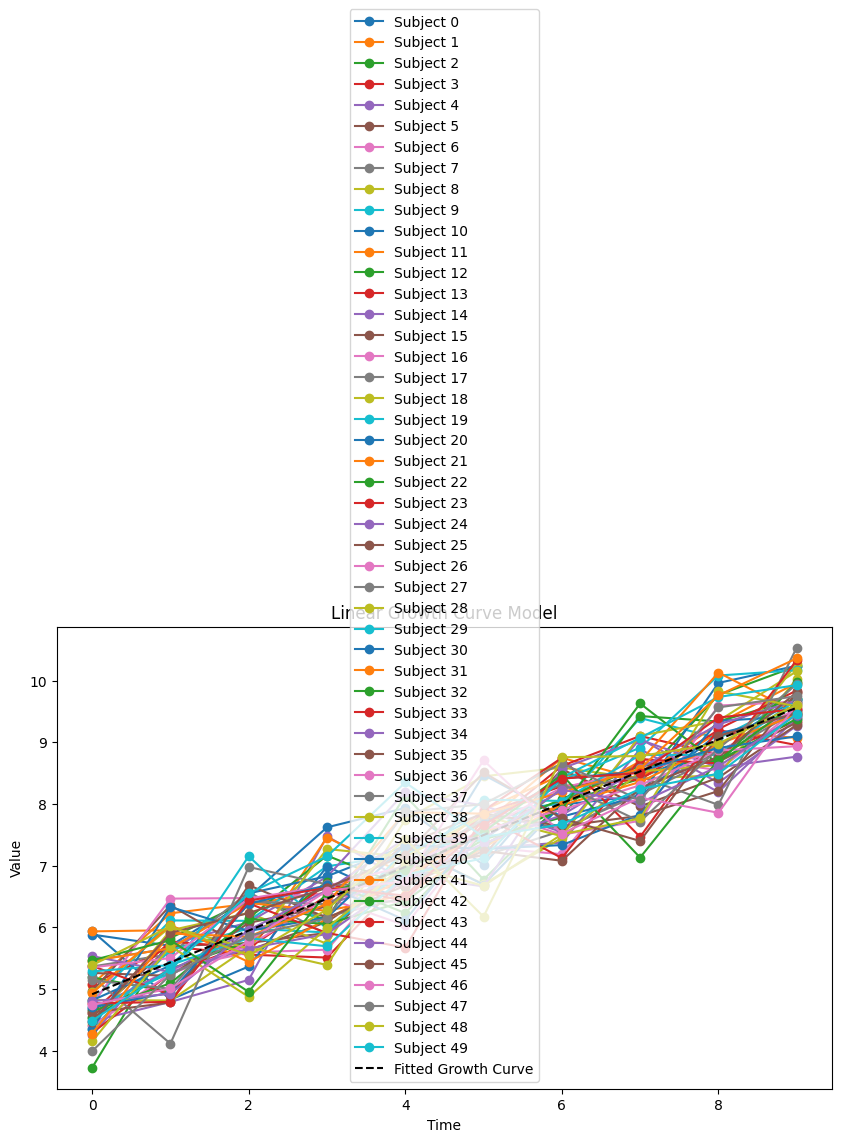

In [ ]:
#gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Generate example longitudinal data
np.random.seed(0)
num_subjects = 5
time_steps = 10
growth_rate = 0.5
baseline_value = 5
time_data = np.tile(np.arange(time_steps), num_subjects)
subject_data = np.repeat(np.arange(num_subjects), time_steps)
value_data = baseline_value + growth_rate * time_data + np.random.normal(scale=0.5, size=num_subjects * time_steps)

# Create DataFrame
df = pd.DataFrame({'subject': subject_data, 'time': time_data, 'value': value_data})

# Fit linear growth curve model
model = ols('value ~ time', data=df).fit()

# Print the summary of the model
print(model.summary())

# Plot the observed data and the fitted growth curve
plt.figure(figsize=(10, 6))
for subject_id, subject_data in df.groupby('subject'):
    plt.plot(subject_data['time'], subject_data['value'], marker='o', label=f'Subject {subject_id}')
plt.plot(df['time'], model.fittedvalues, linestyle='dashed', color='black', label='Fitted Growth Curve')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear Growth Curve Model')
plt.legend()
plt.show()


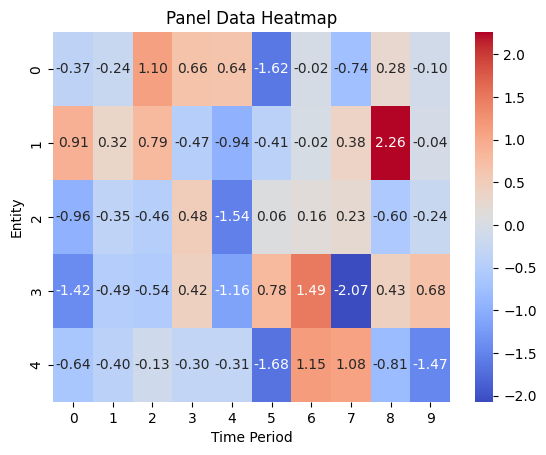

In [ ]:
#panel data heatmap 4(A)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate panel data
n_entities = 5
n_time_periods = 10
data = np.random.randn(n_entities, n_time_periods)

# Create a panel data heatmap
sns.heatmap(data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Panel Data Heatmap')
plt.xlabel('Time Period')
plt.ylabel('Entity')
plt.show()

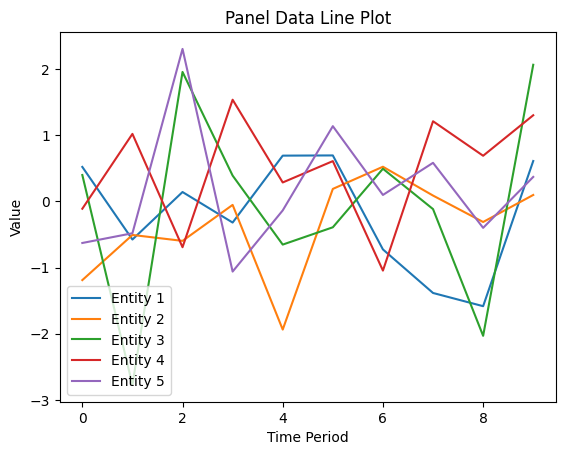

In [ ]:
#paneldata line plot 4(b)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate panel data
n_entities = 5
n_time_periods = 10
data = np.random.randn(n_entities, n_time_periods)

# Create a panel data line plot
for entity in range(n_entities):
    plt.plot(data[entity], label=f'Entity {entity + 1}')

plt.title('Panel Data Line Plot')
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.legend()
plt.show()

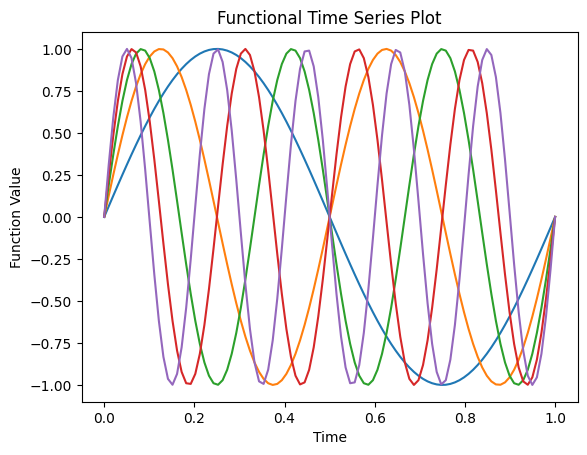

In [ ]:
#functional time series plot 5(a)
import numpy as np
import matplotlib.pyplot as plt

# Generate functional time series data
time_points = np.linspace(0, 1, 100)
num_functions = 5
functions = np.sin(2 * np.pi * time_points[:, np.newaxis] * np.arange(1, num_functions + 1))

# Create a functional time series plotk
plt.plot(time_points, functions)
plt.title('Functional Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Function Value')
plt.show()

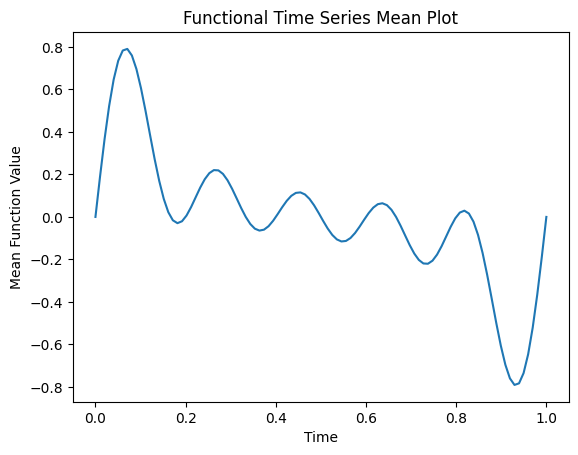

In [ ]:
#functional time series mean plot 5(b)
import numpy as np
import matplotlib.pyplot as plt

# Generate functional time series data
time_points = np.linspace(0, 1, 100)
num_functions = 5
functions = np.sin(2 * np.pi * time_points[:, np.newaxis] * np.arange(1, num_functions + 1))

# Calculate the mean function
mean_function = np.mean(functions, axis=1)

# Create a functional time series mean plot
plt.plot(time_points, mean_function)
plt.title('Functional Time Series Mean Plot')
plt.xlabel('Time')
plt.ylabel('Mean Function Value')
plt.show()
